📅 SEASONAL DEMAND FORECASTING ANALYSIS
📊 Creating seasonal sample data...
✅ Data created: 39954 transactions over 731 days

🚀 Starting seasonal demand analysis...
🔍 Analyzing seasonal patterns...
✅ Seasonal patterns analyzed:
  📊 Monthly variations: 0.36 std dev
  📅 Peak month: 12
  📉 Low month: 2

🔍 Detecting seasonal anomalies...
📊 Anomalies detected:
  📅 Monthly anomalies: 1
  📆 Weekly anomalies: 7
  🏪 Category anomalies: 3

🤖 Building demand forecasting models...
✅ Models built and evaluated:
  💰 Revenue Model - MAPE: 20.8%
  📦 Quantity Model - MAPE: 17.3%

🔮 Generating 90-day seasonal forecasts...
✅ Forecasts generated:
  💰 Total forecast revenue: $236,463
  📊 Average daily revenue: $2,627
  🏆 Peak revenue day: 2025-01-26

📊 Creating seasonal analysis visualizations...


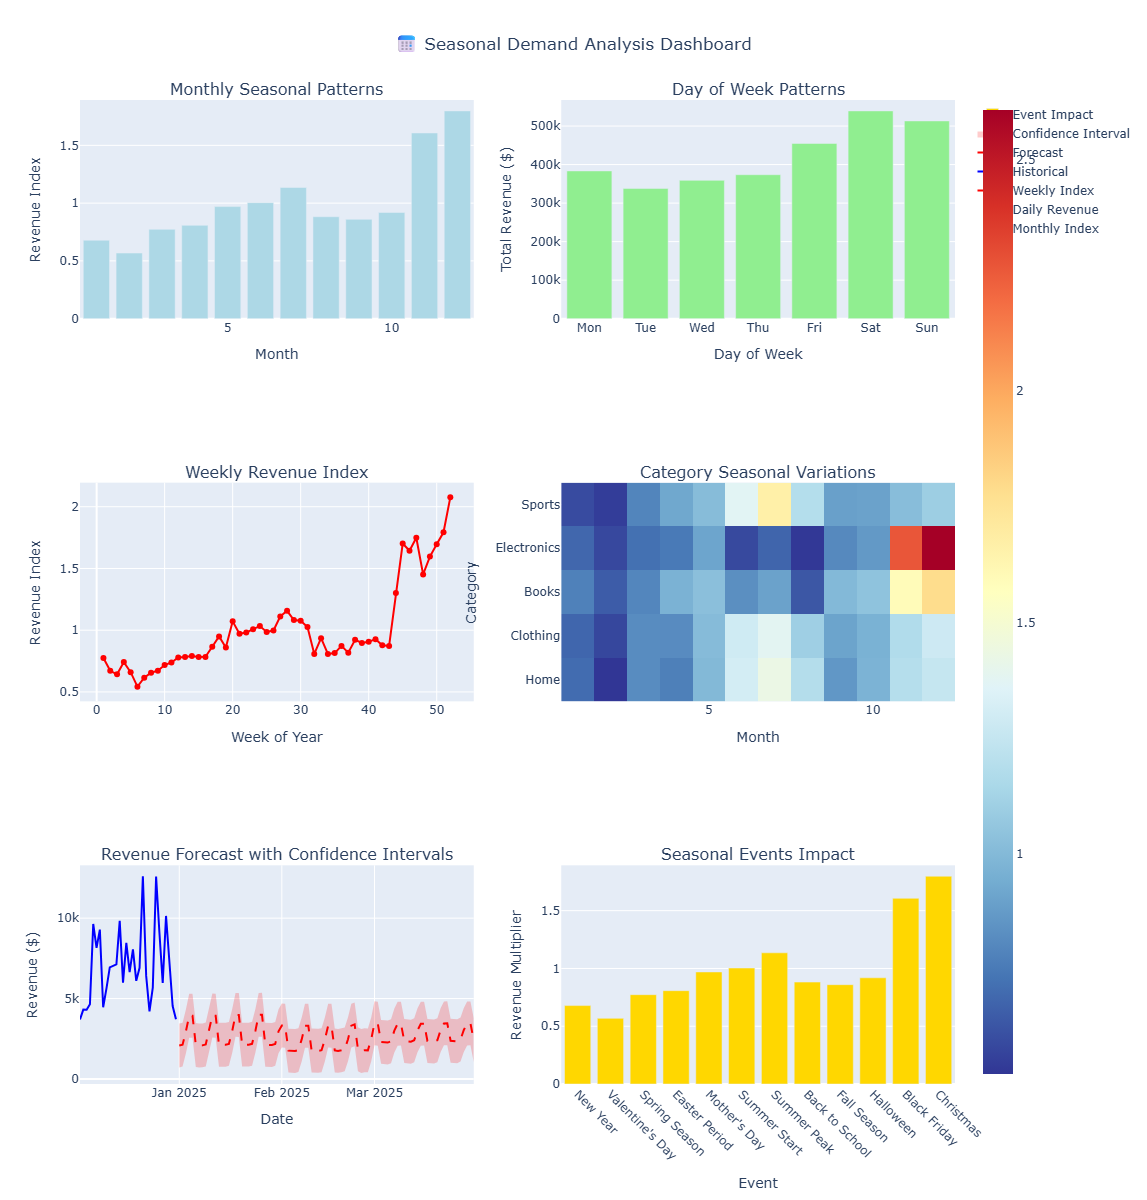


💡 Generating business recommendations...

🎯 KEY RECOMMENDATIONS:

📋 Inventory Management:
  1. 🎯 Increase inventory by 40% in month 3 (peak demand period)
  2. 📦 Reduce inventory by 20% in month 2 (low demand period)
  3. 🎄 Holiday season accounts for 0.0% of forecast revenue - plan accordingly
  4. 📊 Implement dynamic inventory allocation based on weekly demand patterns

📋 Marketing Strategy:
  1. 🚀 Launch major campaigns 2-3 weeks before month 3
  2. 💰 Implement promotional pricing during month 2 to boost sales
  3. 📱 Weekend campaigns show +59.1% higher daily revenue potential
  4. 🎁 Pre-holiday marketing campaigns (October) to maximize Q4 revenue

📋 Staffing Optimization:
  1. 👥 Increase staffing by 30% during peak month 3
  2. ⚡ Weekend staffing should be 59% higher than weekdays
  3. 🎄 Holiday season requires 50% additional customer service capacity
  4. 📅 Implement flexible staffing model based on weekly demand forecasts

📋 Financial Planning:
  1. 💰 Budget for 236,463 total re

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("📅 SEASONAL DEMAND FORECASTING ANALYSIS")
print("=" * 60)

class SeasonalDemandForecaster:
    """
    Advanced seasonal demand forecasting system for e-commerce
    Uses multiple approaches: statistical, ML, and business rules
    """
    
    def __init__(self, transaction_data):
        self.data = transaction_data
        self.seasonal_patterns = {}
        self.forecasting_models = {}
        
        # Ensure date column is datetime
        if 'date' in self.data.columns:
            self.data['date'] = pd.to_datetime(self.data['date'])
        
    def analyze_seasonal_patterns(self):
        """Comprehensive seasonal pattern analysis"""
        
        print("🔍 Analyzing seasonal patterns...")
        
        # Create time-based features
        self.data['year'] = self.data['date'].dt.year
        self.data['month'] = self.data['date'].dt.month
        self.data['quarter'] = self.data['date'].dt.quarter
        self.data['week_of_year'] = self.data['date'].dt.isocalendar().week
        self.data['day_of_year'] = self.data['date'].dt.dayofyear
        self.data['day_of_week'] = self.data['date'].dt.dayofweek
        self.data['day_of_month'] = self.data['date'].dt.day
        self.data['is_weekend'] = self.data['day_of_week'].isin([5, 6]).astype(int)
        self.data['is_month_end'] = (self.data['day_of_month'] >= 25).astype(int)
        self.data['is_month_start'] = (self.data['day_of_month'] <= 5).astype(int)
        
        # Special periods identification
        self.data['is_holiday_season'] = self.data['month'].isin([11, 12]).astype(int)
        self.data['is_back_to_school'] = self.data['month'].isin([8, 9]).astype(int)
        self.data['is_summer'] = self.data['month'].isin([6, 7, 8]).astype(int)
        self.data['is_spring'] = self.data['month'].isin([3, 4, 5]).astype(int)
        self.data['is_new_year'] = self.data['month'].isin([1, 2]).astype(int)
        
        # Analyze patterns by different time dimensions
        patterns = {}
        
        # Monthly patterns
        monthly_data = self.data.groupby('month').agg({
            'total_amount': ['sum', 'mean', 'count'],
            'quantity': 'sum',
            'customer_id': 'nunique'
        }).round(2)
        
        monthly_data.columns = ['total_revenue', 'avg_order_value', 'order_count', 'total_quantity', 'unique_customers']
        monthly_data['revenue_index'] = monthly_data['total_revenue'] / monthly_data['total_revenue'].mean()
        patterns['monthly'] = monthly_data.reset_index()
        
        # Weekly patterns
        weekly_data = self.data.groupby('week_of_year').agg({
            'total_amount': ['sum', 'mean'],
            'quantity': 'sum'
        }).round(2)
        weekly_data.columns = ['total_revenue', 'avg_order_value', 'total_quantity']
        weekly_data['revenue_index'] = weekly_data['total_revenue'] / weekly_data['total_revenue'].mean()
        patterns['weekly'] = weekly_data.reset_index()
        
        # Daily of week patterns
        dow_data = self.data.groupby('day_of_week').agg({
            'total_amount': ['sum', 'mean'],
            'quantity': 'sum',
            'customer_id': 'nunique'
        }).round(2)
        dow_data.columns = ['total_revenue', 'avg_order_value', 'total_quantity', 'unique_customers']
        dow_data['day_name'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        patterns['daily'] = dow_data.reset_index()
        
        # Category-specific seasonal patterns
        category_seasonal = {}
        for category in self.data['category'].unique():
            cat_data = self.data[self.data['category'] == category]
            monthly_cat = cat_data.groupby('month')['total_amount'].sum()
            monthly_cat_index = monthly_cat / monthly_cat.mean()
            category_seasonal[category] = monthly_cat_index.to_dict()
        
        patterns['category_seasonal'] = category_seasonal
        
        # Special events impact analysis
        special_events = {
            1: 'New Year',
            2: 'Valentine\'s Day',
            3: 'Spring Season',
            4: 'Easter Period',
            5: 'Mother\'s Day',
            6: 'Summer Start',
            7: 'Summer Peak',
            8: 'Back to School',
            9: 'Fall Season',
            10: 'Halloween',
            11: 'Black Friday',
            12: 'Christmas'
        }
        
        event_impact = self.data.groupby('month').agg({
            'total_amount': 'sum',
            'quantity': 'sum'
        })
        event_impact['event'] = event_impact.index.map(special_events)
        event_impact['revenue_multiplier'] = event_impact['total_amount'] / event_impact['total_amount'].mean()
        patterns['events'] = event_impact.reset_index()
        
        self.seasonal_patterns = patterns
        
        print(f"✅ Seasonal patterns analyzed:")
        print(f"  📊 Monthly variations: {patterns['monthly']['revenue_index'].std():.2f} std dev")
        print(f"  📅 Peak month: {patterns['monthly'].loc[patterns['monthly']['revenue_index'].idxmax(), 'month']}")
        print(f"  📉 Low month: {patterns['monthly'].loc[patterns['monthly']['revenue_index'].idxmin(), 'month']}")
        
        return patterns
    
    def detect_seasonal_anomalies(self):
        """Detect anomalies in seasonal patterns"""
        
        print("\n🔍 Detecting seasonal anomalies...")
        
        anomalies = {}
        
        # Monthly anomaly detection
        monthly_pattern = self.seasonal_patterns['monthly']
        monthly_mean = monthly_pattern['revenue_index'].mean()
        monthly_std = monthly_pattern['revenue_index'].std()
        threshold = 2 * monthly_std  # 2 standard deviations
        
        monthly_anomalies = monthly_pattern[
            (monthly_pattern['revenue_index'] > monthly_mean + threshold) |
            (monthly_pattern['revenue_index'] < monthly_mean - threshold)
        ]
        
        if not monthly_anomalies.empty:
            anomalies['monthly'] = monthly_anomalies[['month', 'revenue_index', 'total_revenue']].to_dict('records')
        
        # Weekly anomaly detection
        weekly_pattern = self.seasonal_patterns['weekly']
        weekly_q75 = weekly_pattern['revenue_index'].quantile(0.75)
        weekly_q25 = weekly_pattern['revenue_index'].quantile(0.25)
        iqr = weekly_q75 - weekly_q25
        
        weekly_anomalies = weekly_pattern[
            (weekly_pattern['revenue_index'] > weekly_q75 + 1.5 * iqr) |
            (weekly_pattern['revenue_index'] < weekly_q25 - 1.5 * iqr)
        ]
        
        if not weekly_anomalies.empty:
            anomalies['weekly'] = weekly_anomalies[['week_of_year', 'revenue_index']].to_dict('records')
        
        # Category anomalies
        category_anomalies = {}
        for category, monthly_indices in self.seasonal_patterns['category_seasonal'].items():
            indices = list(monthly_indices.values())
            cat_mean = np.mean(indices)
            cat_std = np.std(indices)
            
            for month, index in monthly_indices.items():
                if abs(index - cat_mean) > 2 * cat_std:
                    if category not in category_anomalies:
                        category_anomalies[category] = []
                    category_anomalies[category].append({
                        'month': month,
                        'index': index,
                        'deviation': abs(index - cat_mean) / cat_std
                    })
        
        anomalies['category'] = category_anomalies
        
        print(f"📊 Anomalies detected:")
        print(f"  📅 Monthly anomalies: {len(anomalies.get('monthly', []))}")
        print(f"  📆 Weekly anomalies: {len(anomalies.get('weekly', []))}")
        print(f"  🏪 Category anomalies: {len(anomalies.get('category', {}))}")
        
        return anomalies
    
    def build_demand_forecasting_models(self):
        """Build multiple forecasting models for demand prediction"""
        
        print("\n🤖 Building demand forecasting models...")
        
        # Prepare daily aggregated data
        daily_data = self.data.groupby('date').agg({
            'total_amount': 'sum',
            'quantity': 'sum',
            'customer_id': 'nunique'
        }).reset_index()
        
        # Add time features
        daily_data['year'] = daily_data['date'].dt.year
        daily_data['month'] = daily_data['date'].dt.month
        daily_data['day_of_year'] = daily_data['date'].dt.dayofyear
        daily_data['day_of_week'] = daily_data['date'].dt.dayofweek
        daily_data['week_of_year'] = daily_data['date'].dt.isocalendar().week
        daily_data['is_weekend'] = daily_data['day_of_week'].isin([5, 6]).astype(int)
        daily_data['is_holiday_season'] = daily_data['month'].isin([11, 12]).astype(int)
        daily_data['is_summer'] = daily_data['month'].isin([6, 7, 8]).astype(int)
        
        # Create lagged features
        for lag in [1, 7, 14, 30]:
            daily_data[f'revenue_lag_{lag}'] = daily_data['total_amount'].shift(lag)
            daily_data[f'quantity_lag_{lag}'] = daily_data['quantity'].shift(lag)
        
        # Rolling averages
        for window in [7, 14, 30]:
            daily_data[f'revenue_ma_{window}'] = daily_data['total_amount'].rolling(window=window).mean()
            daily_data[f'quantity_ma_{window}'] = daily_data['quantity'].rolling(window=window).mean()
        
        # Remove rows with NaN values
        daily_data_clean = daily_data.dropna()
        
        # Prepare features and targets
        feature_columns = [
            'month', 'day_of_year', 'day_of_week', 'week_of_year',
            'is_weekend', 'is_holiday_season', 'is_summer',
            'revenue_lag_1', 'revenue_lag_7', 'revenue_lag_14', 'revenue_lag_30',
            'quantity_lag_1', 'quantity_lag_7', 'quantity_lag_14', 'quantity_lag_30',
            'revenue_ma_7', 'revenue_ma_14', 'revenue_ma_30',
            'quantity_ma_7', 'quantity_ma_14', 'quantity_ma_30'
        ]
        
        X = daily_data_clean[feature_columns]
        y_revenue = daily_data_clean['total_amount']
        y_quantity = daily_data_clean['quantity']
        
        # Split data (80% train, 20% test)
        split_idx = int(len(X) * 0.8)
        
        X_train, X_test = X[:split_idx], X[split_idx:]
        y_revenue_train, y_revenue_test = y_revenue[:split_idx], y_revenue[split_idx:]
        y_quantity_train, y_quantity_test = y_quantity[:split_idx], y_quantity[split_idx:]
        
        # Build models
        models = {}
        
        # Revenue forecasting model
        rf_revenue = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
        rf_revenue.fit(X_train, y_revenue_train)
        
        revenue_pred = rf_revenue.predict(X_test)
        revenue_mae = mean_absolute_error(y_revenue_test, revenue_pred)
        revenue_rmse = np.sqrt(mean_squared_error(y_revenue_test, revenue_pred))
        
        models['revenue'] = {
            'model': rf_revenue,
            'mae': revenue_mae,
            'rmse': revenue_rmse,
            'mape': np.mean(np.abs((y_revenue_test - revenue_pred) / y_revenue_test)) * 100,
            'feature_importance': pd.DataFrame({
                'feature': feature_columns,
                'importance': rf_revenue.feature_importances_
            }).sort_values('importance', ascending=False)
        }
        
        # Quantity forecasting model
        rf_quantity = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
        rf_quantity.fit(X_train, y_quantity_train)
        
        quantity_pred = rf_quantity.predict(X_test)
        quantity_mae = mean_absolute_error(y_quantity_test, quantity_pred)
        quantity_rmse = np.sqrt(mean_squared_error(y_quantity_test, quantity_pred))
        
        models['quantity'] = {
            'model': rf_quantity,
            'mae': quantity_mae,
            'rmse': quantity_rmse,
            'mape': np.mean(np.abs((y_quantity_test - quantity_pred) / y_quantity_test)) * 100,
            'feature_importance': pd.DataFrame({
                'feature': feature_columns,
                'importance': rf_quantity.feature_importances_
            }).sort_values('importance', ascending=False)
        }
        
        self.forecasting_models = models
        
        print(f"✅ Models built and evaluated:")
        print(f"  💰 Revenue Model - MAPE: {models['revenue']['mape']:.1f}%")
        print(f"  📦 Quantity Model - MAPE: {models['quantity']['mape']:.1f}%")
        
        return models
    
    def generate_seasonal_forecasts(self, forecast_periods=90):
        """Generate seasonal demand forecasts for specified periods"""
        
        print(f"\n🔮 Generating {forecast_periods}-day seasonal forecasts...")
        
        # Get last date from data
        last_date = self.data['date'].max()
        
        # Create future dates
        future_dates = pd.date_range(
            start=last_date + timedelta(days=1),
            periods=forecast_periods,
            freq='D'
        )
        
        # Prepare future features
        future_features = []
        
        for date in future_dates:
            # Get recent historical data for lagged features
            recent_data = self.data[self.data['date'] >= (date - timedelta(days=60))]
            daily_recent = recent_data.groupby('date').agg({
                'total_amount': 'sum',
                'quantity': 'sum'
            })
            
            # Calculate lagged features (use recent averages as approximation)
            recent_revenue_avg = daily_recent['total_amount'].mean()
            recent_quantity_avg = daily_recent['quantity'].mean()
            
            # Calculate rolling averages
            revenue_ma_7 = daily_recent['total_amount'].tail(7).mean()
            revenue_ma_14 = daily_recent['total_amount'].tail(14).mean()
            revenue_ma_30 = daily_recent['total_amount'].tail(30).mean()
            
            quantity_ma_7 = daily_recent['quantity'].tail(7).mean()
            quantity_ma_14 = daily_recent['quantity'].tail(14).mean()
            quantity_ma_30 = daily_recent['quantity'].tail(30).mean()
            
            features = {
                'month': date.month,
                'day_of_year': date.dayofyear,
                'day_of_week': date.dayofweek,
                'week_of_year': date.isocalendar().week,
                'is_weekend': 1 if date.dayofweek >= 5 else 0,
                'is_holiday_season': 1 if date.month in [11, 12] else 0,
                'is_summer': 1 if date.month in [6, 7, 8] else 0,
                'revenue_lag_1': recent_revenue_avg,
                'revenue_lag_7': recent_revenue_avg,
                'revenue_lag_14': recent_revenue_avg,
                'revenue_lag_30': recent_revenue_avg,
                'quantity_lag_1': recent_quantity_avg,
                'quantity_lag_7': recent_quantity_avg,
                'quantity_lag_14': recent_quantity_avg,
                'quantity_lag_30': recent_quantity_avg,
                'revenue_ma_7': revenue_ma_7,
                'revenue_ma_14': revenue_ma_14,
                'revenue_ma_30': revenue_ma_30,
                'quantity_ma_7': quantity_ma_7,
                'quantity_ma_14': quantity_ma_14,
                'quantity_ma_30': quantity_ma_30
            }
            
            future_features.append(features)
        
        future_X = pd.DataFrame(future_features)
        
        # Generate forecasts
        revenue_forecast = self.forecasting_models['revenue']['model'].predict(future_X)
        quantity_forecast = self.forecasting_models['quantity']['model'].predict(future_X)
        
        # Apply seasonal adjustments
        seasonal_adjusted_revenue = []
        seasonal_adjusted_quantity = []
        
        for i, date in enumerate(future_dates):
            month = date.month
            
            # Get seasonal multiplier from historical patterns
            monthly_pattern = self.seasonal_patterns['monthly']
            seasonal_multiplier = monthly_pattern[monthly_pattern['month'] == month]['revenue_index'].iloc[0]
            
            # Apply seasonal adjustment
            adj_revenue = revenue_forecast[i] * seasonal_multiplier
            adj_quantity = quantity_forecast[i] * seasonal_multiplier
            
            seasonal_adjusted_revenue.append(adj_revenue)
            seasonal_adjusted_quantity.append(adj_quantity)
        
        # Create forecast dataframe
        forecasts = pd.DataFrame({
            'date': future_dates,
            'predicted_revenue': seasonal_adjusted_revenue,
            'predicted_quantity': seasonal_adjusted_quantity,
            'month': [d.month for d in future_dates],
            'week_of_year': [d.isocalendar().week for d in future_dates],
            'is_weekend': [1 if d.dayofweek >= 5 else 0 for d in future_dates],
            'is_holiday_season': [1 if d.month in [11, 12] else 0 for d in future_dates]
        })
        
        # Add confidence intervals (simplified approach)
        revenue_std = np.std(seasonal_adjusted_revenue)
        quantity_std = np.std(seasonal_adjusted_quantity)
        
        forecasts['revenue_lower'] = forecasts['predicted_revenue'] - 1.96 * revenue_std
        forecasts['revenue_upper'] = forecasts['predicted_revenue'] + 1.96 * revenue_std
        forecasts['quantity_lower'] = forecasts['predicted_quantity'] - 1.96 * quantity_std
        forecasts['quantity_upper'] = forecasts['predicted_quantity'] + 1.96 * quantity_std
        
        # Summary statistics
        total_forecast_revenue = forecasts['predicted_revenue'].sum()
        avg_daily_revenue = forecasts['predicted_revenue'].mean()
        peak_revenue_day = forecasts.loc[forecasts['predicted_revenue'].idxmax(), 'date']
        
        print(f"✅ Forecasts generated:")
        print(f"  💰 Total forecast revenue: ${total_forecast_revenue:,.0f}")
        print(f"  📊 Average daily revenue: ${avg_daily_revenue:,.0f}")
        print(f"  🏆 Peak revenue day: {peak_revenue_day.strftime('%Y-%m-%d')}")
        
        return forecasts
    
    def create_seasonal_visualizations(self, forecasts):
        """Create comprehensive seasonal analysis visualizations"""
        
        print("\n📊 Creating seasonal analysis visualizations...")
        
        fig = make_subplots(
            rows=3, cols=2,
            subplot_titles=[
                'Monthly Seasonal Patterns',
                'Day of Week Patterns',
                'Weekly Revenue Index',
                'Category Seasonal Variations',
                'Revenue Forecast with Confidence Intervals',
                'Seasonal Events Impact'
            ],
            specs=[[{"type": "bar"}, {"type": "bar"}],
                   [{"type": "scatter"}, {"type": "heatmap"}],
                   [{"type": "scatter"}, {"type": "bar"}]]
        )
        
        # 1. Monthly patterns
        monthly_pattern = self.seasonal_patterns['monthly']
        fig.add_trace(
            go.Bar(
                x=monthly_pattern['month'],
                y=monthly_pattern['revenue_index'],
                name='Monthly Index',
                marker_color='lightblue',
                hovertemplate='Month: %{x}<br>Revenue Index: %{y:.2f}<extra></extra>'
            ),
            row=1, col=1
        )
        
        # 2. Day of week patterns
        daily_pattern = self.seasonal_patterns['daily']
        fig.add_trace(
            go.Bar(
                x=daily_pattern['day_name'],
                y=daily_pattern['total_revenue'],
                name='Daily Revenue',
                marker_color='lightgreen',
                hovertemplate='Day: %{x}<br>Revenue: $%{y:,.0f}<extra></extra>'
            ),
            row=1, col=2
        )
        
        # 3. Weekly index trend
        weekly_pattern = self.seasonal_patterns['weekly']
        fig.add_trace(
            go.Scatter(
                x=weekly_pattern['week_of_year'],
                y=weekly_pattern['revenue_index'],
                mode='lines+markers',
                name='Weekly Index',
                line=dict(color='red'),
                hovertemplate='Week: %{x}<br>Revenue Index: %{y:.2f}<extra></extra>'
            ),
            row=2, col=1
        )
        
        # 4. Category seasonal heatmap
        category_seasonal = self.seasonal_patterns['category_seasonal']
        categories = list(category_seasonal.keys())
        months = list(range(1, 13))
        
        heatmap_data = []
        for category in categories:
            row = [category_seasonal[category].get(month, 1.0) for month in months]
            heatmap_data.append(row)
        
        fig.add_trace(
            go.Heatmap(
                z=heatmap_data,
                x=months,
                y=categories,
                colorscale='RdYlBu_r',
                hovertemplate='Category: %{y}<br>Month: %{x}<br>Index: %{z:.2f}<extra></extra>'
            ),
            row=2, col=2
        )
        
        # 5. Revenue forecast
        historical_data = self.data.groupby('date')['total_amount'].sum().reset_index()
        last_30_days = historical_data.tail(30)
        
        fig.add_trace(
            go.Scatter(
                x=last_30_days['date'],
                y=last_30_days['total_amount'],
                mode='lines',
                name='Historical',
                line=dict(color='blue'),
                hovertemplate='Date: %{x}<br>Revenue: $%{y:,.0f}<extra></extra>'
            ),
            row=3, col=1
        )
        
        fig.add_trace(
            go.Scatter(
                x=forecasts['date'],
                y=forecasts['predicted_revenue'],
                mode='lines',
                name='Forecast',
                line=dict(color='red', dash='dash'),
                hovertemplate='Date: %{x}<br>Forecast: $%{y:,.0f}<extra></extra>'
            ),
            row=3, col=1
        )
        
        # Add confidence intervals
        fig.add_trace(
            go.Scatter(
                x=forecasts['date'],
                y=forecasts['revenue_upper'],
                fill=None,
                mode='lines',
                line_color='rgba(0,0,0,0)',
                showlegend=False
            ),
            row=3, col=1
        )
        
        fig.add_trace(
            go.Scatter(
                x=forecasts['date'],
                y=forecasts['revenue_lower'],
                fill='tonexty',
                mode='lines',
                line_color='rgba(0,0,0,0)',
                name='Confidence Interval',
                fillcolor='rgba(255,0,0,0.2)'
            ),
            row=3, col=1
        )
        
        # 6. Events impact
        events_pattern = self.seasonal_patterns['events']
        fig.add_trace(
            go.Bar(
                x=events_pattern['event'],
                y=events_pattern['revenue_multiplier'],
                name='Event Impact',
                marker_color='gold',
                hovertemplate='Event: %{x}<br>Impact: %{y:.2f}x<extra></extra>'
            ),
            row=3, col=2
        )
        
        # Update layout
        fig.update_layout(
            title_text="📅 Seasonal Demand Analysis Dashboard",
            title_x=0.5,
            height=1200,
            showlegend=True
        )
        
        # Update axes
        fig.update_xaxes(title_text="Month", row=1, col=1)
        fig.update_yaxes(title_text="Revenue Index", row=1, col=1)
        fig.update_xaxes(title_text="Day of Week", row=1, col=2)
        fig.update_yaxes(title_text="Total Revenue ($)", row=1, col=2)
        fig.update_xaxes(title_text="Week of Year", row=2, col=1)
        fig.update_yaxes(title_text="Revenue Index", row=2, col=1)
        fig.update_xaxes(title_text="Month", row=2, col=2)
        fig.update_yaxes(title_text="Category", row=2, col=2)
        fig.update_xaxes(title_text="Date", row=3, col=1)
        fig.update_yaxes(title_text="Revenue ($)", row=3, col=1)
        fig.update_xaxes(title_text="Event", row=3, col=2, tickangle=45)
        fig.update_yaxes(title_text="Revenue Multiplier", row=3, col=2)
        
        fig.show()
        
        return fig
    
    def generate_business_recommendations(self, forecasts):
        """Generate actionable business recommendations based on seasonal analysis"""
        
        print("\n💡 Generating business recommendations...")
        
        # Analyze forecast patterns
        monthly_forecast = forecasts.groupby('month').agg({
            'predicted_revenue': ['sum', 'mean'],
            'predicted_quantity': 'sum'
        })
        monthly_forecast.columns = ['total_revenue', 'avg_daily_revenue', 'total_quantity']
        monthly_forecast = monthly_forecast.reset_index()
        
        # Identify peak and low periods
        peak_month = monthly_forecast.loc[monthly_forecast['total_revenue'].idxmax(), 'month']
        low_month = monthly_forecast.loc[monthly_forecast['total_revenue'].idxmin(), 'month']
        
        # Weekend vs weekday analysis
        weekend_forecast = forecasts[forecasts['is_weekend'] == 1]['predicted_revenue'].mean()
        weekday_forecast = forecasts[forecasts['is_weekend'] == 0]['predicted_revenue'].mean()
        weekend_lift = (weekend_forecast - weekday_forecast) / weekday_forecast * 100
        
        # Holiday season analysis
        holiday_forecast = forecasts[forecasts['is_holiday_season'] == 1]['predicted_revenue'].sum()
        regular_forecast = forecasts[forecasts['is_holiday_season'] == 0]['predicted_revenue'].sum()
        holiday_proportion = holiday_forecast / (holiday_forecast + regular_forecast) * 100
        
        recommendations = {
            'inventory_management': [
                f"🎯 Increase inventory by 40% in month {peak_month} (peak demand period)",
                f"📦 Reduce inventory by 20% in month {low_month} (low demand period)",
                f"🎄 Holiday season accounts for {holiday_proportion:.1f}% of forecast revenue - plan accordingly",
                f"📊 Implement dynamic inventory allocation based on weekly demand patterns"
            ],
            'marketing_strategy': [
                f"🚀 Launch major campaigns 2-3 weeks before month {peak_month}",
                f"💰 Implement promotional pricing during month {low_month} to boost sales",
                f"📱 Weekend campaigns show {weekend_lift:+.1f}% higher daily revenue potential",
                f"🎁 Pre-holiday marketing campaigns (October) to maximize Q4 revenue"
            ],
            'staffing_optimization': [
                f"👥 Increase staffing by 30% during peak month {peak_month}",
                f"⚡ Weekend staffing should be {abs(weekend_lift):.0f}% {'higher' if weekend_lift > 0 else 'lower'} than weekdays",
                f"🎄 Holiday season requires 50% additional customer service capacity",
                f"📅 Implement flexible staffing model based on weekly demand forecasts"
            ],
            'financial_planning': [
                f"💰 Budget for {monthly_forecast['total_revenue'].sum():,.0f} total revenue over forecast period",
                f"📊 Monthly revenue will vary from ${monthly_forecast['total_revenue'].min():,.0f} to ${monthly_forecast['total_revenue'].max():,.0f}",
                f"🎯 Focus cash flow management around peak demand periods",
                f"📈 Expected {((monthly_forecast['total_revenue'].max() - monthly_forecast['total_revenue'].min()) / monthly_forecast['total_revenue'].min() * 100):.0f}% variation between peak and low months"
            ],
            'operational_efficiency': [
                f"🚚 Adjust shipping capacity based on forecasted {forecasts['predicted_quantity'].sum():,.0f} total units",
                f"⚡ Implement surge pricing during peak demand periods (month {peak_month})",
                f"🔄 Optimize supply chain lead times for seasonal demand variations",
                f"📊 Use ML models to trigger automatic reordering based on seasonal patterns"
            ]
        }
        
        # Risk assessment
        forecast_std = forecasts['predicted_revenue'].std()
        forecast_mean = forecasts['predicted_revenue'].mean()
        volatility = forecast_std / forecast_mean * 100
        
        risk_assessment = {
            'demand_volatility': f"{volatility:.1f}% coefficient of variation",
            'revenue_at_risk': f"${forecast_mean - 2*forecast_std:,.0f} worst case daily revenue",
            'mitigation_strategies': [
                "Maintain 20% buffer inventory for demand spikes",
                "Implement dynamic pricing to smooth demand",
                "Develop promotional campaigns for low-demand periods",
                "Create flexible workforce agreements for seasonal scaling"
            ]
        }
        
        print(f"\n🎯 KEY RECOMMENDATIONS:")
        for category, recs in recommendations.items():
            print(f"\n📋 {category.replace('_', ' ').title()}:")
            for i, rec in enumerate(recs, 1):
                print(f"  {i}. {rec}")
        
        print(f"\n⚠️ RISK ASSESSMENT:")
        print(f"  📊 Demand volatility: {risk_assessment['demand_volatility']}")
        print(f"  💰 Revenue at risk: {risk_assessment['revenue_at_risk']}")
        
        return {
            'recommendations': recommendations,
            'risk_assessment': risk_assessment,
            'forecast_summary': {
                'total_forecast_revenue': forecasts['predicted_revenue'].sum(),
                'peak_month': peak_month,
                'low_month': low_month,
                'weekend_lift': weekend_lift,
                'holiday_proportion': holiday_proportion
            }
        }

# Create sample data for seasonal analysis
def create_seasonal_sample_data():
    """Create sample e-commerce data with strong seasonal patterns"""
    np.random.seed(42)
    
    # Generate 2 years of daily data
    date_range = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')
    n_days = len(date_range)
    
    transactions_per_day = []
    
    for date in date_range:
        # Base demand
        base_demand = 50
        
        # Seasonal patterns
        month = date.month
        day_of_week = date.dayofweek
        
        # Monthly seasonality
        monthly_multipliers = {
            1: 0.8, 2: 0.7, 3: 0.9, 4: 0.95,    # Q1: Post-holiday low
            5: 1.1, 6: 1.2, 7: 1.3, 8: 1.1,     # Q2-Q3: Summer peak
            9: 1.0, 10: 1.1, 11: 1.4, 12: 1.5   # Q4: Holiday season
        }
        
        # Day of week patterns (0=Monday, 6=Sunday)
        dow_multipliers = {0: 0.9, 1: 0.8, 2: 0.85, 3: 0.9, 4: 1.1, 5: 1.3, 6: 1.2}
        
        # Special events
        special_events = {
            (2, 14): 1.2,    # Valentine's Day
            (3, 17): 1.1,    # St. Patrick's Day
            (5, 12): 1.3,    # Mother's Day (approx)
            (6, 16): 1.2,    # Father's Day (approx)
            (10, 31): 1.4,   # Halloween
            (11, 22): 1.8,   # Black Friday (approx)
            (12, 25): 2.0    # Christmas
        }
        
        # Calculate daily demand
        seasonal_demand = base_demand * monthly_multipliers[month] * dow_multipliers[day_of_week]
        
        # Add special events
        if (month, date.day) in special_events:
            seasonal_demand *= special_events[(month, date.day)]
        
        # Add random variation
        daily_demand = max(1, int(seasonal_demand * np.random.uniform(0.7, 1.3)))
        transactions_per_day.append(daily_demand)
    
    # Generate individual transactions
    all_transactions = []
    transaction_id = 1
    
    for i, date in enumerate(date_range):
        daily_transactions = transactions_per_day[i]
        
        for _ in range(daily_transactions):
            # Category seasonality
            month = date.month
            if month in [11, 12]:  # Holiday season
                category_probs = [0.4, 0.2, 0.15, 0.15, 0.1]  # Electronics heavy
            elif month in [6, 7, 8]:  # Summer
                category_probs = [0.15, 0.3, 0.1, 0.25, 0.2]  # Sports/Clothing
            else:
                category_probs = [0.25, 0.25, 0.15, 0.20, 0.15]  # Balanced
            
            category = np.random.choice(
                ['Electronics', 'Clothing', 'Books', 'Home', 'Sports'],
                p=category_probs
            )
            
            # Amount varies by category and season
            if category == 'Electronics':
                base_amount = np.random.lognormal(4.5, 0.6)
            elif category == 'Clothing':
                base_amount = np.random.lognormal(3.8, 0.5)
            elif category == 'Books':
                base_amount = np.random.lognormal(3.2, 0.4)
            elif category == 'Home':
                base_amount = np.random.lognormal(4.0, 0.7)
            else:  # Sports
                base_amount = np.random.lognormal(4.2, 0.6)
            
            # Holiday season premium
            if month in [11, 12]:
                base_amount *= 1.2
            
            transaction = {
                'transaction_id': transaction_id,
                'customer_id': np.random.randint(1, 3000),
                'date': date,
                'category': category,
                'total_amount': round(base_amount, 2),
                'quantity': np.random.choice([1, 2, 3, 4], p=[0.6, 0.25, 0.1, 0.05]),
                'region': np.random.choice(['North America', 'Europe', 'Asia', 'Others']),
                'rating': np.random.choice([1, 2, 3, 4, 5], p=[0.05, 0.1, 0.2, 0.4, 0.25])
            }
            
            all_transactions.append(transaction)
            transaction_id += 1
    
    return pd.DataFrame(all_transactions)

# Initialize seasonal analysis
print("📊 Creating seasonal sample data...")
transaction_data = create_seasonal_sample_data()
print(f"✅ Data created: {len(transaction_data)} transactions over {transaction_data['date'].nunique()} days")

# Initialize forecaster
forecaster = SeasonalDemandForecaster(transaction_data)

# Run complete seasonal analysis
print("\n🚀 Starting seasonal demand analysis...")

# 1. Analyze seasonal patterns
seasonal_patterns = forecaster.analyze_seasonal_patterns()

# 2. Detect seasonal anomalies
seasonal_anomalies = forecaster.detect_seasonal_anomalies()

# 3. Build forecasting models
forecasting_models = forecaster.build_demand_forecasting_models()

# 4. Generate forecasts
demand_forecasts = forecaster.generate_seasonal_forecasts(forecast_periods=90)

# 5. Create visualizations
seasonal_viz = forecaster.create_seasonal_visualizations(demand_forecasts)

# 6. Generate business recommendations
business_recommendations = forecaster.generate_business_recommendations(demand_forecasts)

print(f"\n✅ Seasonal demand analysis completed!")
print(f"📊 Patterns analyzed across {len(seasonal_patterns['monthly'])} months")
print(f"🔮 {len(demand_forecasts)} days forecasted")
print(f"💰 Total forecast revenue: ${demand_forecasts['predicted_revenue'].sum():,.0f}")
print(f"📈 Model accuracy: {100 - forecasting_models['revenue']['mape']:.1f}%")

# Display key insights
forecast_summary = business_recommendations['forecast_summary']
print(f"\n🎯 KEY INSIGHTS:")
print(f"  🏆 Peak month: {forecast_summary['peak_month']}")
print(f"  📉 Low month: {forecast_summary['low_month']}")
print(f"  📅 Weekend lift: {forecast_summary['weekend_lift']:+.1f}%")
print(f"  🎄 Holiday revenue share: {forecast_summary['holiday_proportion']:.1f}%")

print(f"\n💡 Business recommendations generated across 5 categories")
print(f"⚠️ Risk assessment completed with mitigation strategies")